## OpenML Materialization Experiment
In this notebook, we make the plots in Figure 7 (a) and (b) of Section 6.3.

Experiment result is located here:

'./experiment_results/remote/model_materialization/openml/cloud-41/2019-10-21/09-20.csv'


In [1]:
# numpy and pandas for data manipulation
import sys
# Suppress warnings
import warnings
import seaborn as sns
import matplotlib as plt
import networkx as nx
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import os
#from __future__ import unicode_literals
import matplotlib2tikz
plt.style.use('seaborn')
sns.set(style="whitegrid")
sns.set_style({'grid.color': '.5'})
plt.rc('hatch', color='white', linewidth=1)
plt.use('pgf')

FONT_SIZE = 25
LW=5

plt.rcParams.update({
    "lines.markersize": 20,
    "pgf.texsystem": "pdflatex",
    "text.usetex": True,   
    "font.family": "serif",
    "font.serif": [],
    "font.sans-serif": [],
    "font.monospace": [],
    "axes.labelsize": FONT_SIZE,     
    "font.size": FONT_SIZE,
    "legend.fontsize": FONT_SIZE, 
    "xtick.labelsize": FONT_SIZE,
    "ytick.labelsize": FONT_SIZE,
    #"figure.figsize": figsize(1.0), 
     "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        ]
})
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
ROOT_RESULT_FOLDER = '/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/experiment_results'


SYSTEM_COLOR = sns.color_palette()[0]
BASELINE_COLOR = sns.color_palette()[1]

BASELINE_COLOR_2 = sns.color_palette()[2]
BASELINE_COLOR_3 = sns.color_palette()[3]
BASELINE_COLOR_4 = sns.color_palette()[4]
BASELINE_COLOR_5 = sns.color_palette()[5]
BASELINE_COLOR_6 = sns.color_palette()[6]
BASELINE_COLOR_7 = sns.color_palette()[7]

WRITE_DIRECTORY_ROOT = \
'/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/slides/assets'

output_directory = WRITE_DIRECTORY_ROOT + '/experiment-results'
def create_folder(path):
    if not os.path.exists(os.path.dirname(path)):
        try:
            os.makedirs(os.path.dirname(path))
        except OSError as exc:  # Guard against race condition
            if exc.errno != errno.EEXIST:
                raise
def savefig(filename):
    plt.savefig('{}.pgf'.format(filename), bbox_inches='tight')
    plt.savefig('{}.pdf'.format(filename), bbox_inches='tight')

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:18: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/local/Cellar/python@2/2.7.16_1/Frameworks/Python.framework/Versions/2.7/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/local/Cellar/python@2/2.7.16_1/Frameworks/Python.framework/Versions/2.7/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/lo

In [2]:
MODE = 'remote'
result_folder = ROOT_RESULT_FOLDER + '/' + MODE + '/model_materialization/openml'
result_file = result_folder + '/cloud-41/2019-10-21/09-20.csv'

In [3]:
CO = 'Collaborative'
OML = 'Naive'
HEADERS = [
    'timestamp', 'exp_id', 'repo', 'pipeline', 'setup', 'type', 'mat_budget','score',
    'current_run_time', 'best_setup', 'best_pipeline', 'best_score',
    'best_run_time', 'total_run_time'
]

method_map = {'optimized': CO, 'baseline': OML}
model_mat_times = pd.read_csv(result_file, header=None, names=HEADERS)

model_mat_times['cumulative_best_run_time'] = model_mat_times.groupby(['exp_id', 'type','mat_budget'])['best_run_time'].apply(lambda x: x.cumsum())
model_mat_times['cumulative_run_time'] = model_mat_times.groupby(['exp_id', 'type','mat_budget'])['total_run_time'].apply(lambda x: x.cumsum())
model_mat_times['mat_budget'] = model_mat_times['mat_budget'] / (1024. * 1024.)
model_mat_times['cumulative_current_run_time'] = model_mat_times.groupby(['exp_id', 'type','mat_budget'])['current_run_time'].apply(lambda x: x.cumsum())
model_mat_times['workload'] = model_mat_times.groupby(['exp_id', 'type','mat_budget']).cumcount() + 1
model_mat_times['type'] = model_mat_times['type'].replace(method_map)

In [14]:
def plot_mat_time(df,ax, y='cumulative_run_time'):
    plot = sns.lineplot(
        data=df,
        x='workload',
        y=y,
        ax=ax,
        hue='type',
        style='type',
        lw=LW,
        ci='sd',
        hue_order=[CO, OML],
        dashes={
            CO: (1, 0),
            OML: (3, 1)
        },
        palette={
            CO: SYSTEM_COLOR,
            OML: BASELINE_COLOR
        },
        legend='brief')
  
  
    labels = [CO, OML]
    handles=[]
    from matplotlib.lines import Line2D
    handles.append(Line2D([0], [1],
                        color=SYSTEM_COLOR,
                        linewidth=LW-2,
                        dashes=(1, 0)))
    handles.append(Line2D([0], [1],
                        color=BASELINE_COLOR,
                        linewidth=LW-2,
                        dashes=(3, 1)))

    legend = plot.legend(
        handles,
        labels,
        frameon=True,
        borderpad=0.2,
        loc='upper center',
        handlelength=1.2,
        handletextpad=0.2,
        labelspacing=0.1,
        ncol=2,
        columnspacing=0.2,
        bbox_to_anchor=(0.5, 1.15))
    legend.get_frame().set_edgecolor('black')
    legend.get_frame().set_linewidth(2.0)
    plot.tick_params(axis='both', which='major', pad=-2)

    plot.set_xlabel('OpenML Workload')
    plot.set_ylabel('Cumulative \nRun Time (s)')
    plot.yaxis.set_major_formatter(ticker.EngFormatter(sep=''))
    plot.set_ylim((0, 2900))
    plot.set_yticks([0, 500, 1000, 1500, 2000, 2500])
    plot.set_xticks([0, 500, 1000, 1500, 2000])

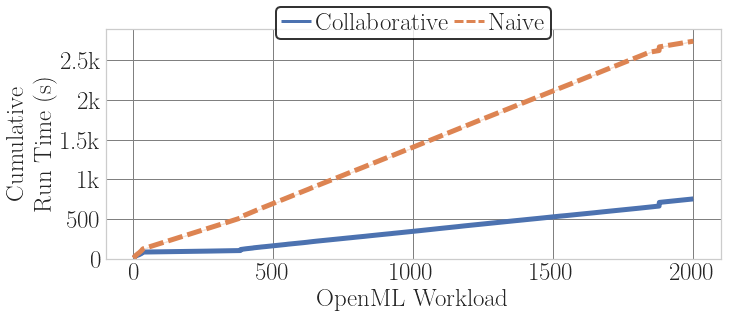

In [15]:
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(12,4))
gs = GridSpec(1, 7)

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
plot_mat_time(model_mat_times, ax)

plt.tight_layout(pad=0,h_pad=0,w_pad=0)
savefig(output_directory+'/model-materialization')